# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст, формулы) формулировка модели многослойного перцептрона
- (текст, формулы) формулировка функции ошибки
- (текст, формулы) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

# Решение

## Постановка задачи

Задачей является классификация рукописных цифр на изображениях из датасета MNIST

softmax применяется для нормировки вероятности к единице

## Препроцессинг

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
#%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

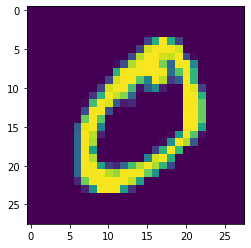

In [5]:
plt.imshow(x_train[1])

In [6]:
y_train[1]

0

выпрямление матрицы в вектор и нормировка

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = np.array(list(map(lambda x: x.reshape((784))/255, x_train)))
x_test = list(map(lambda x: x.reshape((784))/255, x_test))

In [9]:
x_train.shape

(60000, 784)

In [10]:
# for i in range(x_train.shape[-1]):
#     for j in range(x_train.shape[0]):
#         if x_train[j][i] == 0:

Добавим столбец единиц

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=1, include_bias=True)

x_train = poly_model.fit_transform(x_train)
x_test = poly_model.fit_transform(x_test)

one-hot encoding можно было бы импортировать из sklearn, но сделаем сами

In [12]:
def one_hot(index=None):
    zero_list = [0]*10
    zero_list[index] = 1
    return zero_list

In [13]:
y_train[1]

0

In [14]:
y_train = np.array(list(map(lambda x: one_hot(x), y_train)))

In [15]:
y_train[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_train.shape

(60000, 10)

## Реализация алгоритма

In [17]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, *args):
        raise NotImplementedError()
    
    def backward(self, *args):
        raise NotImplementedError()

В качестве функции потерь используем перекрестную энтропию   
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

In [18]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_train):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        self.state = y_train
        
        self.cache = y_pred
        
        print('y_train', self.state)
        print('y_pred', y_pred)
        ### YOUR CODE HERE
        loss_value = sum(-sum(self.state * np.log(y_pred)))/self.state.shape[0]
                
        return loss_value
    
    
    def backward(self):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        ### YOUR CODE HERE
        y_pred = self.cache
        partial_grad = (y_pred - self.state).T 
        print('(y_pred - self.state)', (y_pred - self.state))
        
        return partial_grad

In [44]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        ### YOUR CODE HERE
#         print('upstream_grad_l1', upstream_grad.shape)
#         print('x_train_l1', self.cache.shape)
        partial_grad = upstream_grad.T @ self.cache
        #partial_grad = x_train 
        
#         print('partial_grad', partial_grad[0][0])
        
        return partial_grad

    
    def forward(self, x_train):
        # этот метод предназначен для применения модели к данным
        assert x_train.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
#         x_train = poly_model.fit_transform(x_train)
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X

            ### YOUR CODE HERE
            self.theta = np.random.randn(x_train.shape[-1]*10).reshape(x_train.shape[-1],10)
        
        
        # Здесь следует собственно применить модель к входным данным
        
        ### YOUR CODE HERE
        
        y_pred = x_train@self.theta
        
        self.cache = x_train
        
        return y_pred

In [38]:
class Linear_hiden(Differentiable):
    def __init__(self):
        super(Linear_hiden, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        ### YOUR CODE HERE
        print('upstream_grad_l2', upstream_grad.shape)
        print('x_train_l2', self.cache.shape)
        partial_grad = upstream_grad.T @ self.cache.T

        
        print('partial_grad', partial_grad[0][0])
        
        return partial_grad

    
    def forward(self, x_train):
        # этот метод предназначен для применения модели к данным
        assert x_train.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
#         x_train = poly_model.fit_transform(x_train)
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X

            ### YOUR CODE HERE
            self.theta = np.random.randn(x_train.shape[-1]*10).reshape(x_train.shape[-1],10)
        
        
        # Здесь следует собственно применить модель к входным данным
        
        ### YOUR CODE HERE
        
        y_pred = x_train@self.theta
        
        self.cache = self.theta
        
        return y_pred

In [39]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        #print('np.maximum(self.value_sign, 0).T', np.maximum(self.value_sign, 0).T)
        print('activation', upstream_grad.shape, np.maximum(self.value_sign, 0).shape)
        
        partial_grad =  upstream_grad * np.maximum(self.value_sign, 0)
        #partial_grad = upstream_grad
        
#         print('partial_activ ', partial_grad.shape, '= upstream ', upstream_grad.shape, 
#                            ' * sign ', np.maximum(self.value_sign, 0).T.shape)
        
        return partial_grad
    
    def forward(self, x_train):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        #x_train = poly_model.fit_transform(x_train)
        print('x_train_activ', x_train)
        self.value_sign = np.sign(x_train)
    
        y_pred = np.maximum(x_train, 0)
        #y_pred = x_train
        
        return y_pred

In [40]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        partial_grad = np.zeros((x_train.shape))
        #softmax_val = Softmax.forward(x_train)
        softmax_val = self.forward_val
        
        for i in range(partial_grad.shape[0]*len(softmax_val[0])):
            for j in range(partial_grad.shape[1]):
                if i != j:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i] * softmax_val[j]
                else:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i]*(1 - softmax_val[i])
        
        return partial_grad 
    
    def forward(self, y_pred):
        # args = [x]
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        shifty = y_pred - np.max(y_pred)
        exps = np.exp(shifty)
        y_pred = exps / np.sum(exps)
        
        self.forward_val = y_pred
        
        return y_pred

In [41]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        
        self.Sm=Softmax()
        self.activ=Activation()
        self.lr_1=Linear()
        self.lr_2=Linear_hiden()
        self.parameters = None
        
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, x_train, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        #partial_grad = self.Sm.backward(self.activ.backward(self.lr.backward(x_train)))
#         partial_grad = self.activ.backward(self.lr.backward(x_train))
        #print('percept upstream_grad', upstream_grad.shape)
        #print('percept local_grad ', self.lr.backward(x_train, self.activ.backward()).shape)
        partial_grad = self.lr_1.backward(self.activ.backward(self.lr_2.backward(upstream_grad)))
        #partial_grad = self.lr.backward(x_train)
        
        return partial_grad
    
    def forward(self, x_train, theta):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        #y_pred = self.Sm.forward(self.lr.forward(x_train))
        y_pred = self.Sm.forward(self.lr_2.forward(self.activ.forward(self.lr_1.forward(x_train))))
        
        return y_pred

In [51]:
def train_loop(x_train, y_train, model, loss_fn, epochs=100):
    np.random.seed(1)
    loss_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        #batch selection
        batch_size = 1
        alpha = 1e-2
        
        concat = np.concatenate((x_train, y_train), axis=1)
        #np.random.shuffle(concat)
        concat = concat[:batch_size]
        x_batch_train = concat[:,0:785]
        y_batch_train = concat[:,785:795]
#         x_batch_train=np.array([x_train[1]])
#         y_batch_train=np.array([y_train[1]])
            
        loss_value = loss_fn.forward(model.forward(x_batch_train, model.lr_1.theta), y_batch_train)
        #grad = loss_fn.backward(model.forward(x_train), model.backward(x_train))
        grad = model.backward(x_batch_train, loss_fn.backward())
        print('grad', (alpha*grad.T[0][:10]))
        print('theta', model.lr_1.theta[0][:10])

        model.lr_1.theta = model.lr_1.theta - alpha*grad.T
        #print(model.theta)
#         print(model.theta[0][0])
#         print((alpha*grad.T)[0][0])
        
        loss_history.append(loss_value)
        pbar.update(1)
        #print(loss_value)
        pbar.set_postfix({'loss': loss_value})
        print('----------------')
    pbar.close()
    return loss_history

In [52]:
obj_fn = loss()
model = Perceptron()
loss_history = train_loop(x_train, y_train, model, obj_fn, epochs=100)




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:00<00:36,  2.70it/s]


  1%|          | 1/100 [00:00<00:36,  2.70it/s, loss=48.8]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    0.15281851  12.6143932    5.87761329  11.11346296  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.56438048e-13 1.34346554e-21 7.29665046e-12 1.02159574e-22
  1.59800178e-06 6.33688572e-22 1.72134705e-15 1.42355383e-09
  5.85562901e-13 9.99998401e-01]]
(y_pred - self.state) [[ 1.56438048e-13  1.34346554e-21  7.29665046e-12  1.02159574e-22
   1.59800178e-06 -1.00000000e+00  1.72134705e-15  1.42355383e-09
   5.85562901e-13  9.99998401e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.18605625533789766
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00902062
  0.01259891  0.01082502  0.02401864  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
----------------





  2%|▏         | 2/100 [00:00<00:37,  2.60it/s, loss=48.8]


  2%|▏         | 2/100 [00:00<00:37,  2.60it/s, loss=40.2]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    0.98586858  11.45088966   4.87792706   8.89535229  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.81875557e-12 5.25445977e-19 2.38471288e-09 1.32499065e-19
  8.57165140e-06 3.53656215e-18 6.82637980e-13 3.42358796e-07
  3.31209549e-11 9.99991084e-01]]
(y_pred - self.state) [[ 3.81875557e-12  5.25445977e-19  2.38471288e-09  1.32499065e-19
   8.57165140e-06 -1.00000000e+00  6.82637980e-13  3.42358796e-07
   3.31209549e-11  9.99991084e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.186053303938286
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00902068
  0.01259892  0.01082487  0.02401862  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.29251808
  1.73221286 -0.77203193  0.29502046 -0.24937038]
----------------





  3%|▎         | 3/100 [00:01<00:38,  2.53it/s, loss=40.2]


  3%|▎         | 3/100 [00:01<00:38,  2.53it/s, loss=31.6]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    1.8189244   10.28738501   3.87825487   6.6772437   -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[9.32038488e-11 2.05482755e-16 7.79281465e-07 1.71823879e-16
  4.59714064e-05 1.97347577e-14 2.70677852e-10 8.23229053e-05
  1.87313506e-09 9.99870924e-01]]
(y_pred - self.state) [[ 9.32038488e-11  2.05482755e-16  7.79281465e-07  1.71823879e-16
   4.59714064e-05 -1.00000000e+00  2.70677852e-10  8.23229053e-05
   1.87313506e-09  9.99870924e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.18608324801457665
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00902066
  0.01259991  0.01082161  0.02401724  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.2834974
  1.71961394 -0.7828568   0.27100184 -0.24937038]
----------------





  4%|▍         | 4/100 [00:01<00:41,  2.30it/s, loss=31.6]


  4%|▍         | 4/100 [00:01<00:41,  2.30it/s, loss=22.9]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    2.65197803   9.12378874   2.87888358   4.45926189  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.22853103e-09 7.87669468e-14 2.49525921e-04 2.18301977e-13
  2.41556319e-04 1.07906568e-10 1.05152502e-07 1.93830107e-02
  1.03785602e-07 9.80125696e-01]]
(y_pred - self.state) [[ 2.22853103e-09  7.87669468e-14  2.49525921e-04  2.18301977e-13
   2.41556319e-04 -1.00000000e+00  1.05152502e-07  1.93830107e-02
   1.03785602e-07  9.80125696e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.19699835686761458
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.0089363
  0.01282379  0.010229    0.02371352  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.27447674
  1.70701403 -0.79367841  0.2469846  -0.24937038]
----------------





  5%|▌         | 5/100 [00:02<00:43,  2.20it/s, loss=22.9]


  5%|▌         | 5/100 [00:02<00:43,  2.20it/s, loss=16]  

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    3.47724152   7.93951731   1.93423956   2.26932855  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.01770943e-08 6.36686951e-12 1.54322389e-02 5.31695024e-11
  2.44539566e-04 1.14328733e-07 7.76167414e-06 7.76996358e-01
  1.10169911e-06 2.07317875e-01]]
(y_pred - self.state) [[ 1.01770943e-08  6.36686951e-12  1.54322389e-02  5.31695024e-11
   2.44539566e-04 -9.99999886e-01  7.76167414e-06  7.76996358e-01
   1.10169911e-06  2.07317875e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.6273694469722443
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00554868
  0.02162914 -0.01290368  0.01166955  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.26554044
  1.69419023 -0.80390742  0.22327107 -0.24937038]
----------------





  6%|▌         | 6/100 [00:02<00:42,  2.22it/s, loss=16]


  6%|▌         | 6/100 [00:02<00:42,  2.22it/s, loss=10.4]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    3.98965976   5.9420757    3.12588855   1.19165096  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[6.88386961e-09 3.55012732e-09 2.04523377e-01 2.14010433e-09
  5.06650908e-05 2.96496569e-05 6.65093636e-05 4.90315928e-02
  1.92418246e-06 7.46296270e-01]]
(y_pred - self.state) [[ 6.88386961e-09  3.55012732e-09  2.04523377e-01  2.14010433e-09
   5.06650908e-05 -9.99970350e-01  6.65093636e-05  4.90315928e-02
   1.92418246e-06  7.46296270e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.15590515058948992
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00856586
  0.01415541  0.00832163  0.01794772  0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.25999176
  1.67256109 -0.79100374  0.21160153 -0.24937038]
----------------





  7%|▋         | 7/100 [00:03<00:41,  2.23it/s, loss=10.4]


  7%|▋         | 7/100 [00:03<00:41,  2.23it/s, loss=6.1] 

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    4.78071295   4.63482988   2.35738968  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.84219815e-08 8.56695270e-08 6.85156496e-01 6.78861743e-08
  2.40507930e-05 2.25273885e-03 9.56892549e-04 1.78520303e-01
  1.31897836e-05 1.33076147e-01]]
(y_pred - self.state) [[ 2.84219815e-08  8.56695270e-08  6.85156496e-01  6.78861743e-08
   2.40507930e-05 -9.97747261e-01  9.56892549e-04  1.78520303e-01
   1.31897836e-05  1.33076147e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.09376568791346754
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00740827
  0.01794468  0.00196993  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.2514259
  1.65840568 -0.79932537  0.19365381 -0.24937038]
----------------





  8%|▊         | 8/100 [00:03<00:43,  2.13it/s, loss=6.1]


  8%|▊         | 8/100 [00:03<00:43,  2.13it/s, loss=2.69]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    5.46486357   2.97764653   2.17546734  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[5.11125173e-07 6.92815184e-06 5.98055204e-01 1.47078745e-06
  2.53030731e-05 6.75805015e-02 1.20968537e-02 1.02715658e-01
  2.81854949e-04 2.19235714e-01]]
(y_pred - self.state) [[ 5.11125173e-07  6.92815184e-06  5.98055204e-01  1.47078745e-06
   2.53030731e-05 -9.32419498e-01  1.20968537e-02  1.02715658e-01
   2.81854949e-04  2.19235714e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.07628699623756287
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00718455
  0.01573794  0.00378033  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.24401763
  1.640461   -0.8012953   0.19365381 -0.24937038]
----------------





  9%|▉         | 9/100 [00:04<00:43,  2.10it/s, loss=2.69]


  9%|▉         | 9/100 [00:04<00:43,  2.10it/s, loss=0.532]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.12835376   1.52425438   1.82635596  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.74625250e-06 1.24959678e-04 1.98886110e-01 1.03167075e-05
  1.24268360e-05 5.87675870e-01 5.66445498e-02 3.92454793e-02
  2.33522015e-03 1.15061321e-01]]
(y_pred - self.state) [[ 3.74625250e-06  1.24959678e-04  1.98886110e-01  1.03167075e-05
   1.24268360e-05 -4.12324130e-01  5.66445498e-02  3.92454793e-02
   2.33522015e-03  1.15061321e-01]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.11104594422389373
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00294378
  0.00615458  0.00114896  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.23683308
  1.62472306 -0.80507563  0.19365381 -0.24937038]
----------------





 10%|█         | 10/100 [00:04<00:41,  2.19it/s, loss=0.532]


 10%|█         | 10/100 [00:04<00:41,  2.19it/s, loss=0.229]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.40021035   0.95588164   1.72024997  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[4.39525986e-06 2.23810647e-04 7.56895941e-02 1.22763757e-05
  5.18986226e-06 7.94936392e-01 5.84750193e-02 1.46513295e-02
  2.94466745e-03 5.30573251e-02]]
(y_pred - self.state) [[ 4.39525986e-06  2.23810647e-04  7.56895941e-02  1.22763757e-05
   5.18986226e-06 -2.05063608e-01  5.84750193e-02  1.46513295e-02
   2.94466745e-03  5.30573251e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.09611439614133213
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00131205
  0.00263923  0.00021024  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.2338893
  1.61856848 -0.80622459  0.19365381 -0.24937038]
----------------





 11%|█         | 11/100 [00:04<00:40,  2.22it/s, loss=0.229]


 11%|█         | 11/100 [00:04<00:40,  2.22it/s, loss=0.163]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.5213774    0.71215037   1.70083438  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[4.17716470e-06 2.70719024e-04 4.75209686e-02 1.20639856e-05
  3.24222007e-06 8.49672222e-01 5.44170365e-02 8.54893714e-03
  2.93155833e-03 3.66190748e-02]]
(y_pred - self.state) [[ 4.17716470e-06  2.70719024e-04  4.75209686e-02  1.20639856e-05
   3.24222007e-06 -1.50327778e-01  5.44170365e-02  8.54893714e-03
   2.93155833e-03  3.66190748e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.08563553227425992
activation (1, 10) (1, 10)
grad [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.04132996e-04  1.77235435e-03  1.96071747e-05
  0.00000000e+00  0.00000000e+00]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.23257725
  1.61592925 -0.80643483  0.19365381 -0.24937038]
----------------





 12%|█▏        | 12/100 [00:05<00:40,  2.19it/s, loss=0.163]


 12%|█▏        | 12/100 [00:05<00:40,  2.19it/s, loss=0.131]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.60487368   0.54847423   1.69902366  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.88979845e-06 3.04148555e-04 3.44994100e-02 1.16252309e-05
  2.30074070e-06 8.77412693e-01 5.07046276e-02 5.74569238e-03
  2.83557905e-03 2.84800333e-02]]
(y_pred - self.state) [[ 3.88979845e-06  3.04148555e-04  3.44994100e-02  1.16252309e-05
   2.30074070e-06 -1.22587307e-01  5.07046276e-02  5.74569238e-03
   2.83557905e-03  2.84800333e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.07809661795066392
activation (1, 10) (1, 10)
grad [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.05638712e-04  1.35572857e-03 -5.82630247e-05
  0.00000000e+00  0.00000000e+00]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.23167312
  1.6141569  -0.80645443  0.19365381 -0.24937038]
----------------





 13%|█▎        | 13/100 [00:05<00:39,  2.21it/s, loss=0.131]


 13%|█▎        | 13/100 [00:05<00:39,  2.21it/s, loss=0.111]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.6700391    0.42327329   1.70440423  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.61131204e-06 3.31071625e-04 2.69499037e-02 1.11581016e-05
  1.74558782e-06 8.94777131e-01 4.75174948e-02 4.16061421e-03
  2.72135984e-03 2.35259095e-02]]
(y_pred - self.state) [[ 3.61131204e-06  3.31071625e-04  2.69499037e-02  1.11581016e-05
   1.74558782e-06 -1.05222869e-01  4.75174948e-02  4.16061421e-03
   2.72135984e-03  2.35259095e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.07223373890945792
activation (1, 10) (1, 10)
grad [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.85695946e-04  1.10679893e-03 -9.73567773e-05
  0.00000000e+00  0.00000000e+00]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.23096748
  1.61280117 -0.80639617  0.19365381 -0.24937038]
----------------





 14%|█▍        | 14/100 [00:06<00:37,  2.27it/s, loss=0.111]


 14%|█▍        | 14/100 [00:06<00:37,  2.27it/s, loss=0.0977]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.72412787   0.3210609    1.71339508  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.35630362e-06 3.54087386e-04 2.20177769e-02 1.07072253e-05
  1.38148158e-06 9.06915763e-01 4.47713593e-02 3.15881166e-03
  2.60591590e-03 2.01608407e-02]]
(y_pred - self.state) [[ 3.35630362e-06  3.54087386e-04  2.20177769e-02  1.07072253e-05
   1.38148158e-06 -9.30842368e-02  4.47713593e-02  3.15881166e-03
   2.60591590e-03  2.01608407e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.06745234767464094
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00050445
  0.0009399  -0.00011888  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.23038178
  1.61169437 -0.80629881  0.19365381 -0.24937038]
----------------





 15%|█▌        | 15/100 [00:06<00:36,  2.33it/s, loss=0.0977]


 15%|█▌        | 15/100 [00:06<00:36,  2.33it/s, loss=0.0877]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.77071336   0.23426165   1.7243732   -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[3.12631538e-06 3.74462387e-04 1.85447073e-02 1.02840851e-05
  1.12599692e-06 9.16002768e-01 4.23779640e-02 2.47921237e-03
  2.49482795e-03 1.77115213e-02]]
(y_pred - self.state) [[ 3.12631538e-06  3.74462387e-04  1.85447073e-02  1.02840851e-05
   1.12599692e-06 -8.39972318e-02  4.23779640e-02  2.47921237e-03
   2.49482795e-03  1.77115213e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.06342857055312585
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00044533
  0.00081958 -0.00013117  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22987734
  1.61075447 -0.80617994  0.19365381 -0.24937038]
----------------





 16%|█▌        | 16/100 [00:07<00:35,  2.37it/s, loss=0.0877]


 16%|█▌        | 16/100 [00:07<00:35,  2.37it/s, loss=0.08]  

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.81183902   0.15857345   1.73648666  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.91957458e-06 3.92913342e-04 1.59690421e-02 9.89055930e-06
  9.38090199e-07 9.23130042e-01 4.02681795e-02 1.99479550e-03
  2.38995012e-03 1.58413290e-02]]
(y_pred - self.state) [[ 2.91957458e-06  3.92913342e-04  1.59690421e-02  9.89055930e-06
   9.38090199e-07 -7.68699578e-02  4.02681795e-02  1.99479550e-03
   2.38995012e-03  1.58413290e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.059966287666347616
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00040013
  0.00072839 -0.00013816  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22943201
  1.60993489 -0.80604877  0.19365381 -0.24937038]
----------------





 17%|█▋        | 17/100 [00:07<00:35,  2.31it/s, loss=0.08]


 17%|█▋        | 17/100 [00:07<00:35,  2.31it/s, loss=0.0737]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.84879114   0.09130664   1.74924562  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.73355817e-06 4.09887218e-04 1.39848031e-02 9.52541664e-06
  7.94980384e-07 9.28912058e-01 3.83897710e-02 1.63655570e-03
  2.29172407e-03 1.43621467e-02]]
(y_pred - self.state) [[ 2.73355817e-06  4.09887218e-04  1.39848031e-02  9.52541664e-06
   7.94980384e-07 -7.10879417e-02  3.83897710e-02  1.63655570e-03
   2.29172407e-03  1.43621467e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.05693741696494009
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00036432
  0.00065669 -0.00014191  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22903188
  1.6092065  -0.80591061  0.19365381 -0.24937038]
----------------





 18%|█▊        | 18/100 [00:07<00:35,  2.33it/s, loss=0.0737]


 18%|█▊        | 18/100 [00:07<00:35,  2.33it/s, loss=0.0686]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.88243592   0.03066197   1.76235078  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.56575985e-06 4.25682606e-04 1.24108893e-02 9.18645964e-06
  6.83005105e-07 9.33723847e-01 3.67030305e-02 1.36394010e-03
  2.20001846e-03 1.31601568e-02]]
(y_pred - self.state) [[ 2.56575985e-06  4.25682606e-04  1.24108893e-02  9.18645964e-06
   6.83005105e-07 -6.62761531e-02  3.67030305e-02  1.36394010e-03
   2.20001846e-03  1.31601568e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.054253485036699356
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00033515
  0.00059869 -0.00014359  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22866756
  1.60854981 -0.8057687   0.19365381 -0.24937038]
----------------





 19%|█▉        | 19/100 [00:08<00:34,  2.35it/s, loss=0.0686]


 19%|█▉        | 19/100 [00:08<00:34,  2.35it/s, loss=0.0656]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.91338671  -0.02462639   1.77561135  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.40794382e-06 4.27824057e-04 1.16060969e-02 8.79182605e-06
  6.13090947e-07 9.36518632e-01 3.55669578e-02 1.22047673e-03
  2.11993854e-03 1.25282609e-02]]
(y_pred - self.state) [[ 2.40794382e-06  4.27824057e-04  1.16060969e-02  8.79182605e-06
   6.13090947e-07 -6.34813679e-02  3.55669578e-02  1.22047673e-03
   2.11993854e-03  1.25282609e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.052471338588159874
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.0003191
  0.         -0.00014184  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22833241
  1.60795112 -0.80562511  0.19365381 -0.24937038]
----------------





 20%|██        | 20/100 [00:08<00:34,  2.34it/s, loss=0.0656]


 20%|██        | 20/100 [00:08<00:34,  2.34it/s, loss=0.0645]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.94285525  -0.02462639   1.78871011  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.25779238e-06 4.15263353e-04 1.14408560e-02 8.33817948e-06
  5.74609379e-07 9.37564376e-01 3.49547273e-02 1.17491703e-03
  2.05103916e-03 1.23876505e-02]]
(y_pred - self.state) [[ 2.25779238e-06  4.15263353e-04  1.14408560e-02  8.33817948e-06
   5.74609379e-07 -6.24356239e-02  3.49547273e-02  1.17491703e-03
   2.05103916e-03  1.23876505e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.051529303521698176
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00031421
  0.         -0.00013743  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22801331
  1.60795112 -0.80548327  0.19365381 -0.24937038]
----------------





 21%|██        | 21/100 [00:09<00:33,  2.36it/s, loss=0.0645]


 21%|██        | 21/100 [00:09<00:33,  2.36it/s, loss=0.0634]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    6.97187244  -0.02462639   1.80140192  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[2.11988654e-06 4.03218333e-04 1.12788220e-02 7.91558598e-06
  5.39171576e-07 9.38574337e-01 3.43672244e-02 1.13215003e-03
  1.98594632e-03 1.22477272e-02]]
(y_pred - self.state) [[ 2.11988654e-06  4.03218333e-04  1.12788220e-02  7.91558598e-06
   5.39171576e-07 -6.14256630e-02  3.43672244e-02  1.13215003e-03
   1.98594632e-03  1.22477272e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.050626553441055565
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00030946
  0.         -0.00013331  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.2276991
  1.60795112 -0.80534584  0.19365381 -0.24937038]
----------------





 22%|██▏       | 22/100 [00:09<00:32,  2.39it/s, loss=0.0634]


 22%|██▏       | 22/100 [00:09<00:32,  2.39it/s, loss=0.0624]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.00045076  -0.02462639   1.81371325  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.99298327e-06 3.91663906e-04 1.11200144e-02 7.52138478e-06
  5.06486624e-07 9.39550489e-01 3.38027833e-02 1.09193256e-03
  1.92435485e-03 1.21087412e-02]]
(y_pred - self.state) [[ 1.99298327e-06  3.91663906e-04  1.11200144e-02  7.52138478e-06
   5.06486624e-07 -6.04495110e-02  3.38027833e-02  1.09193256e-03
   1.92435485e-03  1.21087412e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.049760370786502715
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00030484
  0.         -0.00012945  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22738964
  1.60795112 -0.80521253  0.19365381 -0.24937038]
----------------





 23%|██▎       | 23/100 [00:10<00:32,  2.38it/s, loss=0.0624]


 23%|██▎       | 23/100 [00:10<00:32,  2.38it/s, loss=0.0613]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.02860221  -0.02462639   1.82566819  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.87599098e-06 3.80576193e-04 1.09644357e-02 7.15319018e-06
  4.76296272e-07 9.40494645e-01 3.32598941e-02 1.05404873e-03
  1.86599165e-03 1.19709033e-02]]
(y_pred - self.state) [[ 1.87599098e-06  3.80576193e-04  1.09644357e-02  7.15319018e-06
   4.76296272e-07 -5.95053551e-02  3.32598941e-02  1.05404873e-03
   1.86599165e-03  1.19709033e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.04892829949749221
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00030034
  0.         -0.00012583  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22708481
  1.60795112 -0.80508307  0.19365381 -0.24937038]
----------------





 24%|██▍       | 24/100 [00:10<00:31,  2.41it/s, loss=0.0613]


 24%|██▍       | 24/100 [00:10<00:31,  2.41it/s, loss=0.0604]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.05633835  -0.02462639   1.83728869  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.76794802e-06 3.69932496e-04 1.08120746e-02 6.80885809e-06
  4.48370718e-07 9.41408475e-01 3.27371849e-02 1.01830626e-03
  1.81061153e-03 1.18343905e-02]]
(y_pred - self.state) [[ 1.76794802e-06  3.69932496e-04  1.08120746e-02  6.80885809e-06
   4.48370718e-07 -5.85915255e-02  3.27371849e-02  1.01830626e-03
   1.81061153e-03  1.18343905e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.04812811348352708
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00029596
  0.         -0.00012243  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22678447
  1.60795112 -0.80495724  0.19365381 -0.24937038]
----------------





 25%|██▌       | 25/100 [00:10<00:32,  2.28it/s, loss=0.0604]


 25%|██▌       | 25/100 [00:10<00:32,  2.28it/s, loss=0.0594]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.08367034  -0.02462639   1.84859483  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.66800461e-06 3.59711264e-04 1.06629085e-02 6.48645729e-06
  4.22504996e-07 9.42293520e-01 3.22334060e-02 9.84533364e-04
  1.75799375e-03 1.16993500e-02]]
(y_pred - self.state) [[ 1.66800461e-06  3.59711264e-04  1.06629085e-02  6.48645729e-06
   4.22504996e-07 -5.77064799e-02  3.22334060e-02  9.84533364e-04
   1.75799375e-03  1.16993500e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.04735778957899629
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.0002917
  0.         -0.00011922  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22648851
  1.60795112 -0.80483481  0.19365381 -0.24937038]
----------------





 26%|██▌       | 26/100 [00:11<00:32,  2.27it/s, loss=0.0594]


 26%|██▌       | 26/100 [00:11<00:32,  2.27it/s, loss=0.0585]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.11060894  -0.02462639   1.859605    -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.57540770e-06 3.49892049e-04 1.05169052e-02 6.18424464e-06
  3.98515894e-07 9.43151210e-01 3.17474160e-02 9.52576065e-04
  1.70793903e-03 1.15659035e-02]]
(y_pred - self.state) [[ 1.57540770e-06  3.49892049e-04  1.05169052e-02  6.18424464e-06
   3.98515894e-07 -5.68487900e-02  3.17474160e-02  9.52576065e-04
   1.70793903e-03  1.15659035e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.046615484256000476
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00028755
  0.         -0.0001162   0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.2261968
  1.60795112 -0.80471559  0.19365381 -0.24937038]
----------------





 27%|██▋       | 27/100 [00:11<00:31,  2.29it/s, loss=0.0585]


 27%|██▋       | 27/100 [00:11<00:31,  2.29it/s, loss=0.0576]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.13716451  -0.02462639   1.87033605  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.48948810e-06 3.40455465e-04 1.03740248e-02 5.90064359e-06
  3.76239299e-07 9.43982870e-01 3.12781701e-02 9.22295983e-04
  1.66026697e-03 1.14341502e-02]]
(y_pred - self.state) [[ 1.48948810e-06  3.40455465e-04  1.03740248e-02  5.90064359e-06
   3.76239299e-07 -5.60171300e-02  3.12781701e-02  9.22295983e-04
   1.66026697e-03  1.14341502e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.045899513500071175
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00028352
  0.         -0.00011335  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22590925
  1.60795112 -0.80459939  0.19365381 -0.24937038]
----------------





 28%|██▊       | 28/100 [00:12<00:30,  2.33it/s, loss=0.0576]


 28%|██▊       | 28/100 [00:12<00:30,  2.33it/s, loss=0.0568]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.16334706  -0.02462639   1.88080348  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.40964960e-06 3.31383142e-04 1.02342213e-02 5.63422556e-06
  3.55527912e-07 9.44789734e-01 3.08247100e-02 8.93568407e-04
  1.61481385e-03 1.13041703e-02]]
(y_pred - self.state) [[ 1.40964960e-06  3.31383142e-04  1.02342213e-02  5.63422556e-06
   3.55527912e-07 -5.52102664e-02  3.08247100e-02  8.93568407e-04
   1.61481385e-03  1.13041703e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.04520833535869969
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00027958
  0.         -0.00011065  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22562573
  1.60795112 -0.80448604  0.19365381 -0.24937038]
----------------





 29%|██▉       | 29/100 [00:12<00:30,  2.34it/s, loss=0.0568]


 29%|██▉       | 29/100 [00:12<00:30,  2.34it/s, loss=0.056] 

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    7.18916624  -0.02462639   1.89102159  -0.46581271  -8.88229746]]
y_train [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
y_pred [[1.33535972e-06 3.22657675e-04 1.00974435e-02 5.38369361e-06
  3.36249268e-07 9.45572951e-01 3.03861542e-02 8.66280652e-04
  1.57143078e-03 1.11760271e-02]]
(y_pred - self.state) [[ 1.33535972e-06  3.22657675e-04  1.00974435e-02  5.38369361e-06
   3.36249268e-07 -5.44270493e-02  3.03861542e-02  8.66280652e-04
   1.57143078e-03  1.11760271e-02]]
upstream_grad_l2 (10, 1)
x_train_l2 (10, 10)
partial_grad -0.044540534757241006
activation (1, 10) (1, 10)
grad [ 0.          0.          0.          0.          0.         -0.00027575
  0.         -0.00010809  0.          0.        ]
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.22534615
  1.60795112 -0.8043754   0.19365381 -0.24937038]
----------------
x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.

KeyboardInterrupt: 

## Анализ результатов